<a href="https://colab.research.google.com/github/pranaydurnala/Data-analyst-projects/blob/main/Powerlifting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/powerlifting_dataset.csv")
df

,Lifter Name,Age,Weight Class,Lift Type,Amount Lifted (kg)
0,Jessica Wilson,46,59 kg,Bench Press,269
1,John Doe,60,83 kg,Bench Press,179
2,Emily Davis,41,105 kg,Bench Press,235
3,Emily Davis,33,66 kg,Squat,359
4,Laura Taylor,56,74 kg,Deadlift,221
...,...,...,...,...,...
2995,John Doe,46,74 kg,Bench Press,246
2996,Daniel Lee,39,Open,Deadlift,244
2997,Sarah Thomas,62,Open,Squat,148
2998,Chris Brown,32,93 kg,Bench Press,333


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lifter Name         3000 non-null   object
 1   Age                 3000 non-null   int64 
 2   Weight Class        3000 non-null   object
 3   Lift Type           3000 non-null   object
 4   Amount Lifted (kg)  3000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 117.3+ KB


In [ ]:
df.describe()

,Age,Amount Lifted (kg)
count,3000.000000,3000.000000
mean,41.064000,250.332667
std,13.682628,86.281208
min,18.000000,100.000000
25%,29.000000,176.750000
50%,41.000000,250.000000
75%,53.000000,325.250000
max,64.000000,399.000000


In [ ]:
df.isna().sum()

,0
Lifter Name,0
Age,0
Weight Class,0
Lift Type,0
Amount Lifted (kg),0


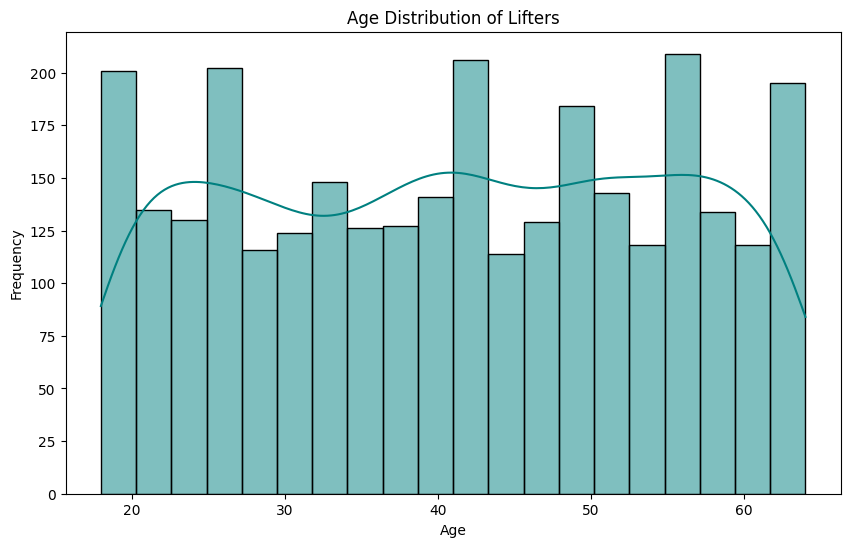

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='teal')
plt.title("Age Distribution of Lifters")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<ipython-input-11-fb4d7c034e89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Weight Class'], order=df['Weight Class'].value_counts().index, palette='viridis')


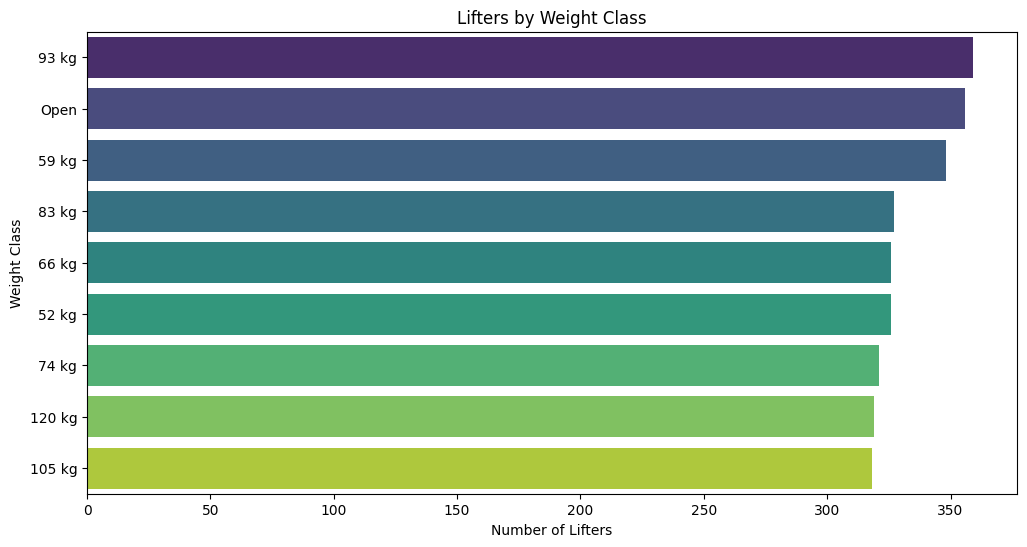

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Weight Class'], order=df['Weight Class'].value_counts().index, palette='viridis')
plt.title("Lifters by Weight Class")
plt.xlabel("Number of Lifters")
plt.ylabel("Weight Class")
plt.show()


<ipython-input-13-af8aa25b7d29>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Lift Type', y='Amount Lifted (kg)', estimator='mean', ci=None, palette="magma")
<ipython-input-13-af8aa25b7d29>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Lift Type', y='Amount Lifted (kg)', estimator='mean', ci=None, palette="magma")


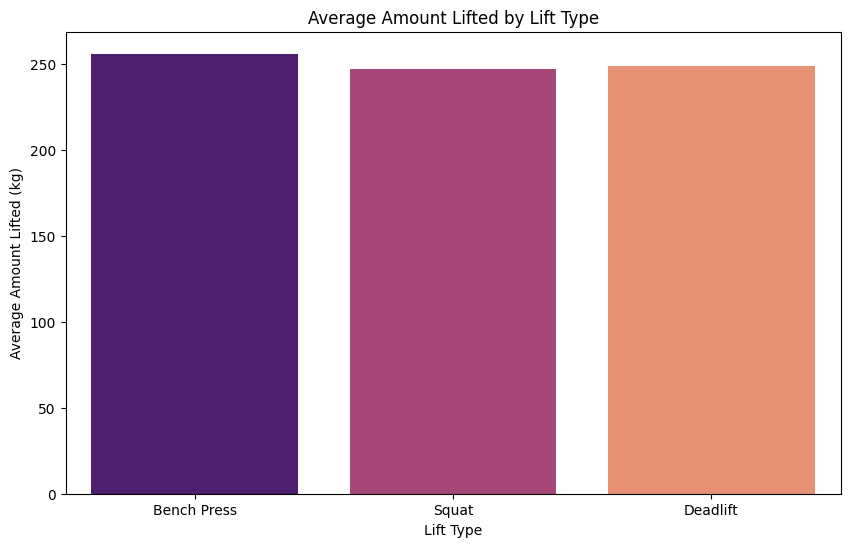

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Lift Type', y='Amount Lifted (kg)', estimator='mean', ci=None, palette="magma")
plt.title("Average Amount Lifted by Lift Type")
plt.xlabel("Lift Type")
plt.ylabel("Average Amount Lifted (kg)")
plt.show()


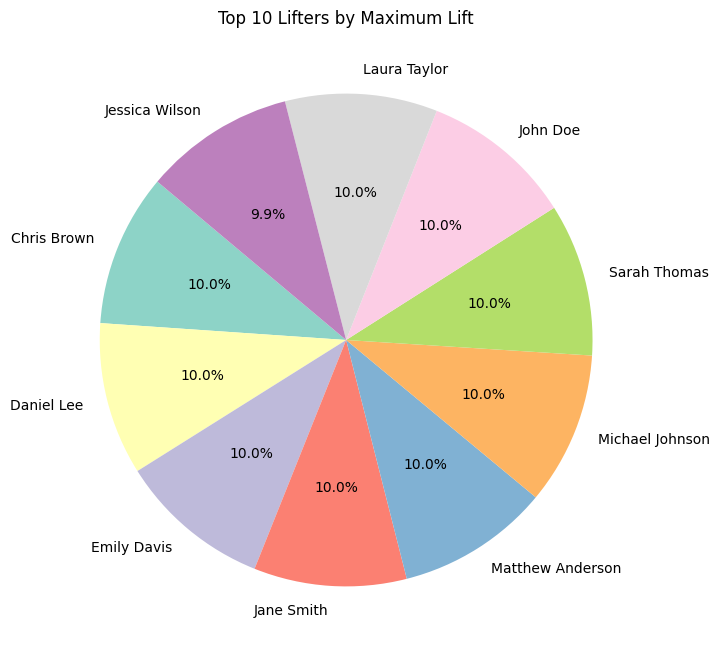

In [ ]:
top_lifters = df.groupby('Lifter Name')['Amount Lifted (kg)'].max().nlargest(10)
plt.figure(figsize=(8, 8))
plt.pie(top_lifters.values, labels=top_lifters.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Top 10 Lifters by Maximum Lift")
plt.show()

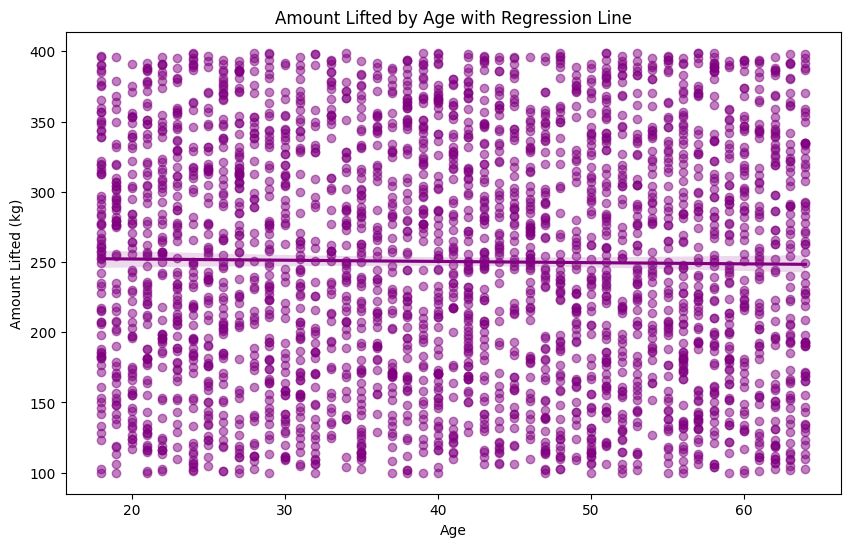

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age', y='Amount Lifted (kg)', scatter_kws={'alpha':0.5}, color='purple')
plt.title("Amount Lifted by Age with Regression Line")
plt.xlabel("Age")
plt.ylabel("Amount Lifted (kg)")
plt.show()


<ipython-input-18-eaf901c45f5e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Weight Class', y='Amount Lifted (kg)', palette="coolwarm")


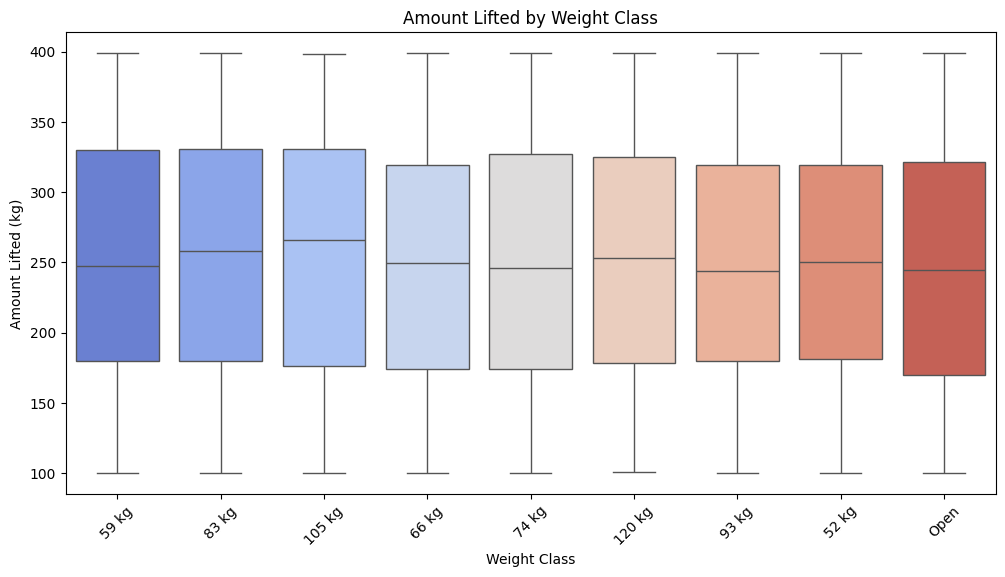

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Weight Class', y='Amount Lifted (kg)', palette="coolwarm")
plt.title("Amount Lifted by Weight Class")
plt.xlabel("Weight Class")
plt.ylabel("Amount Lifted (kg)")
plt.xticks(rotation=45)
plt.show()


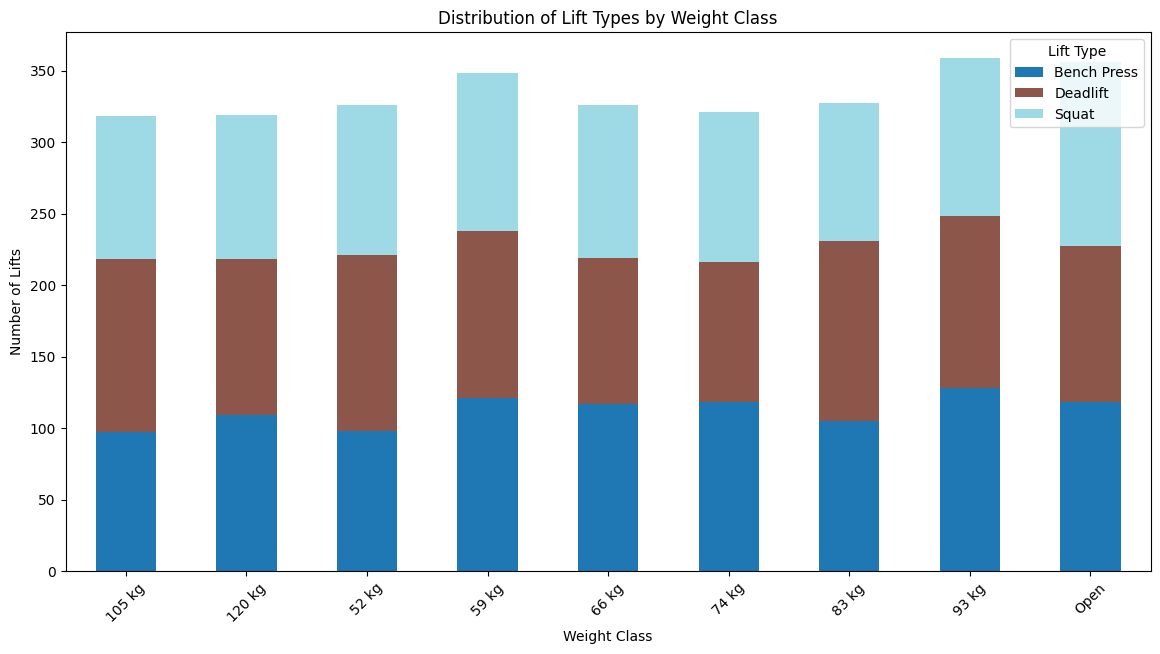

In [ ]:
weight_class_lift_type = df.groupby(['Weight Class', 'Lift Type']).size().unstack()
weight_class_lift_type.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title("Distribution of Lift Types by Weight Class")
plt.xlabel("Weight Class")
plt.ylabel("Number of Lifts")
plt.xticks(rotation=45)
plt.legend(title="Lift Type")
plt.show()


<ipython-input-20-97e3e3ba84ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Age Group', y='Amount Lifted (kg)', palette='Set2', inner="quartile")


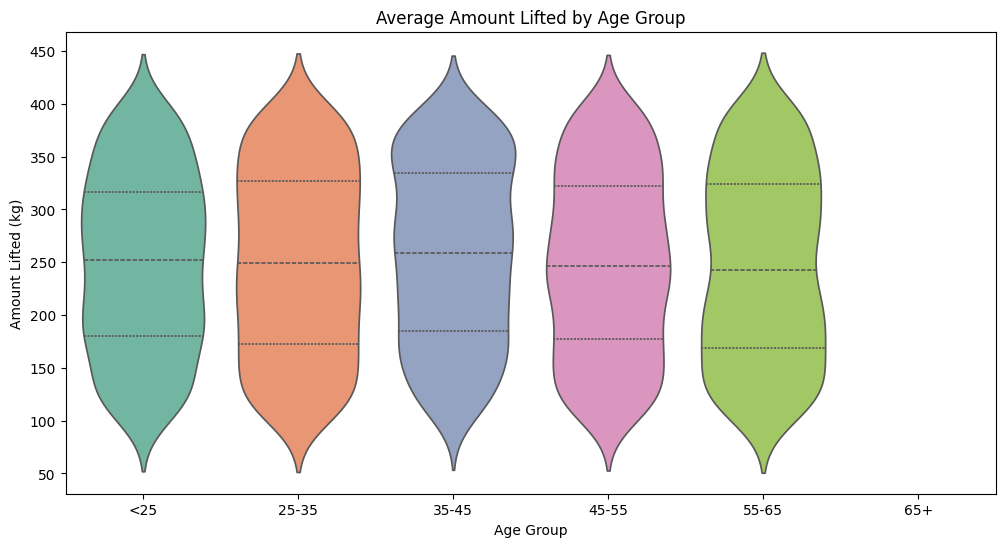

In [ ]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=["<25", "25-35", "35-45", "45-55", "55-65", "65+"])
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Age Group', y='Amount Lifted (kg)', palette='Set2', inner="quartile")
plt.title("Average Amount Lifted by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Amount Lifted (kg)")
plt.show()


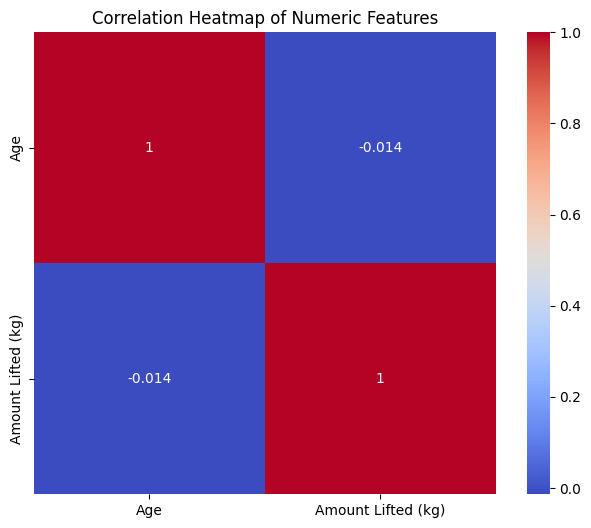

In [ ]:
plt.figure(figsize=(8, 6))
numeric_cols = df.select_dtypes(include=['int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


<ipython-input-22-a71759700f75>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_lift_type = df.groupby(['Age Group', 'Lift Type']).size().unstack()


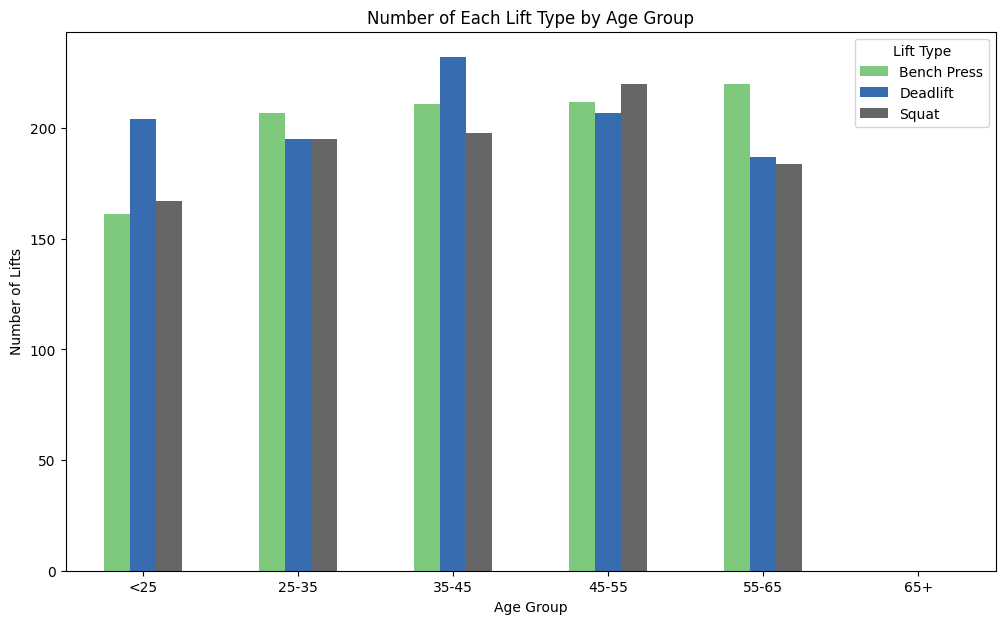

In [ ]:
age_group_lift_type = df.groupby(['Age Group', 'Lift Type']).size().unstack()
age_group_lift_type.plot(kind='bar', figsize=(12, 7), colormap='Accent')
plt.title("Number of Each Lift Type by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Lifts")
plt.xticks(rotation=0)
plt.legend(title="Lift Type")
plt.show()
